In [ ]:
import pandas as pd

train = pd.read_csv('train.csv', index_col= 0);
print(train.shape)
print(train.info())
print(train.head())
print(train.columns)
print(train.index)


In [ ]:
test = pd.read_csv('test.csv', index_col= 0);
print(test.shape)
print(test.info())
print(test.head())
print(test.columns)
print(test.index)

In [ ]:
print("train:", train.shape)
print("test:", test.shape)


In [ ]:
train.head()



In [ ]:
X = pd.concat([train.drop(columns=['SalePrice'], axis=1), test], axis=0)
print(X.shape)
print("="*100)
print(X.info())
print("="*100)
print(X.head())
print("="*100)
print(X.columns)
print("="*100)
print(X.index)
print("="*100)


    

In [ ]:
X = pd.concat([train.drop(columns=['SalePrice'], axis=1), test], axis=0)
print(X.shape)
print("="*100)
print(X.info())
print("="*100)
print(X.head())
print("="*100)
print(X.columns)
print("="*100)
print(X.index)
print("="*100)






In [ ]:
# 方法1：双括号 - 返回DataFrame
y1 = train[['SalePrice']]
print("y1的类型:", type(y1))
print("y1的形状:", y1.shape)
print("y1的内容:")
print(y1.head())

# 方法2：单括号 - 返回Series
y2 = train['SalePrice']
print("\ny2的类型:", type(y2))
print("y2的形状:", y2.shape)
print("y2的内容:")
print(y2.head())

In [ ]:
numeric_ = X.select_dtypes(exclude=['object']).drop(['MSSubClass'], axis=1).copy()
print(numeric_)
print("="*100)
print(numeric_.shape)
print("="*100)
print(numeric_.info())
print("="*100)
print(numeric_.head())
print("="*100)
print(numeric_.columns)
print("="*100)
print(numeric_.index)










In [142]:
disc_num_var = ['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']
cont_num_var = []
for i in numeric_.columns:
    if i not in disc_num_var:
        cont_num_var.append(i)

In [ ]:
cat_train = X.select_dtypes(include=['object']).copy()
cat_train['MSSubClass'] = X['MSSubClass']
print(cat_train.shape)
print(cat_train.columns)

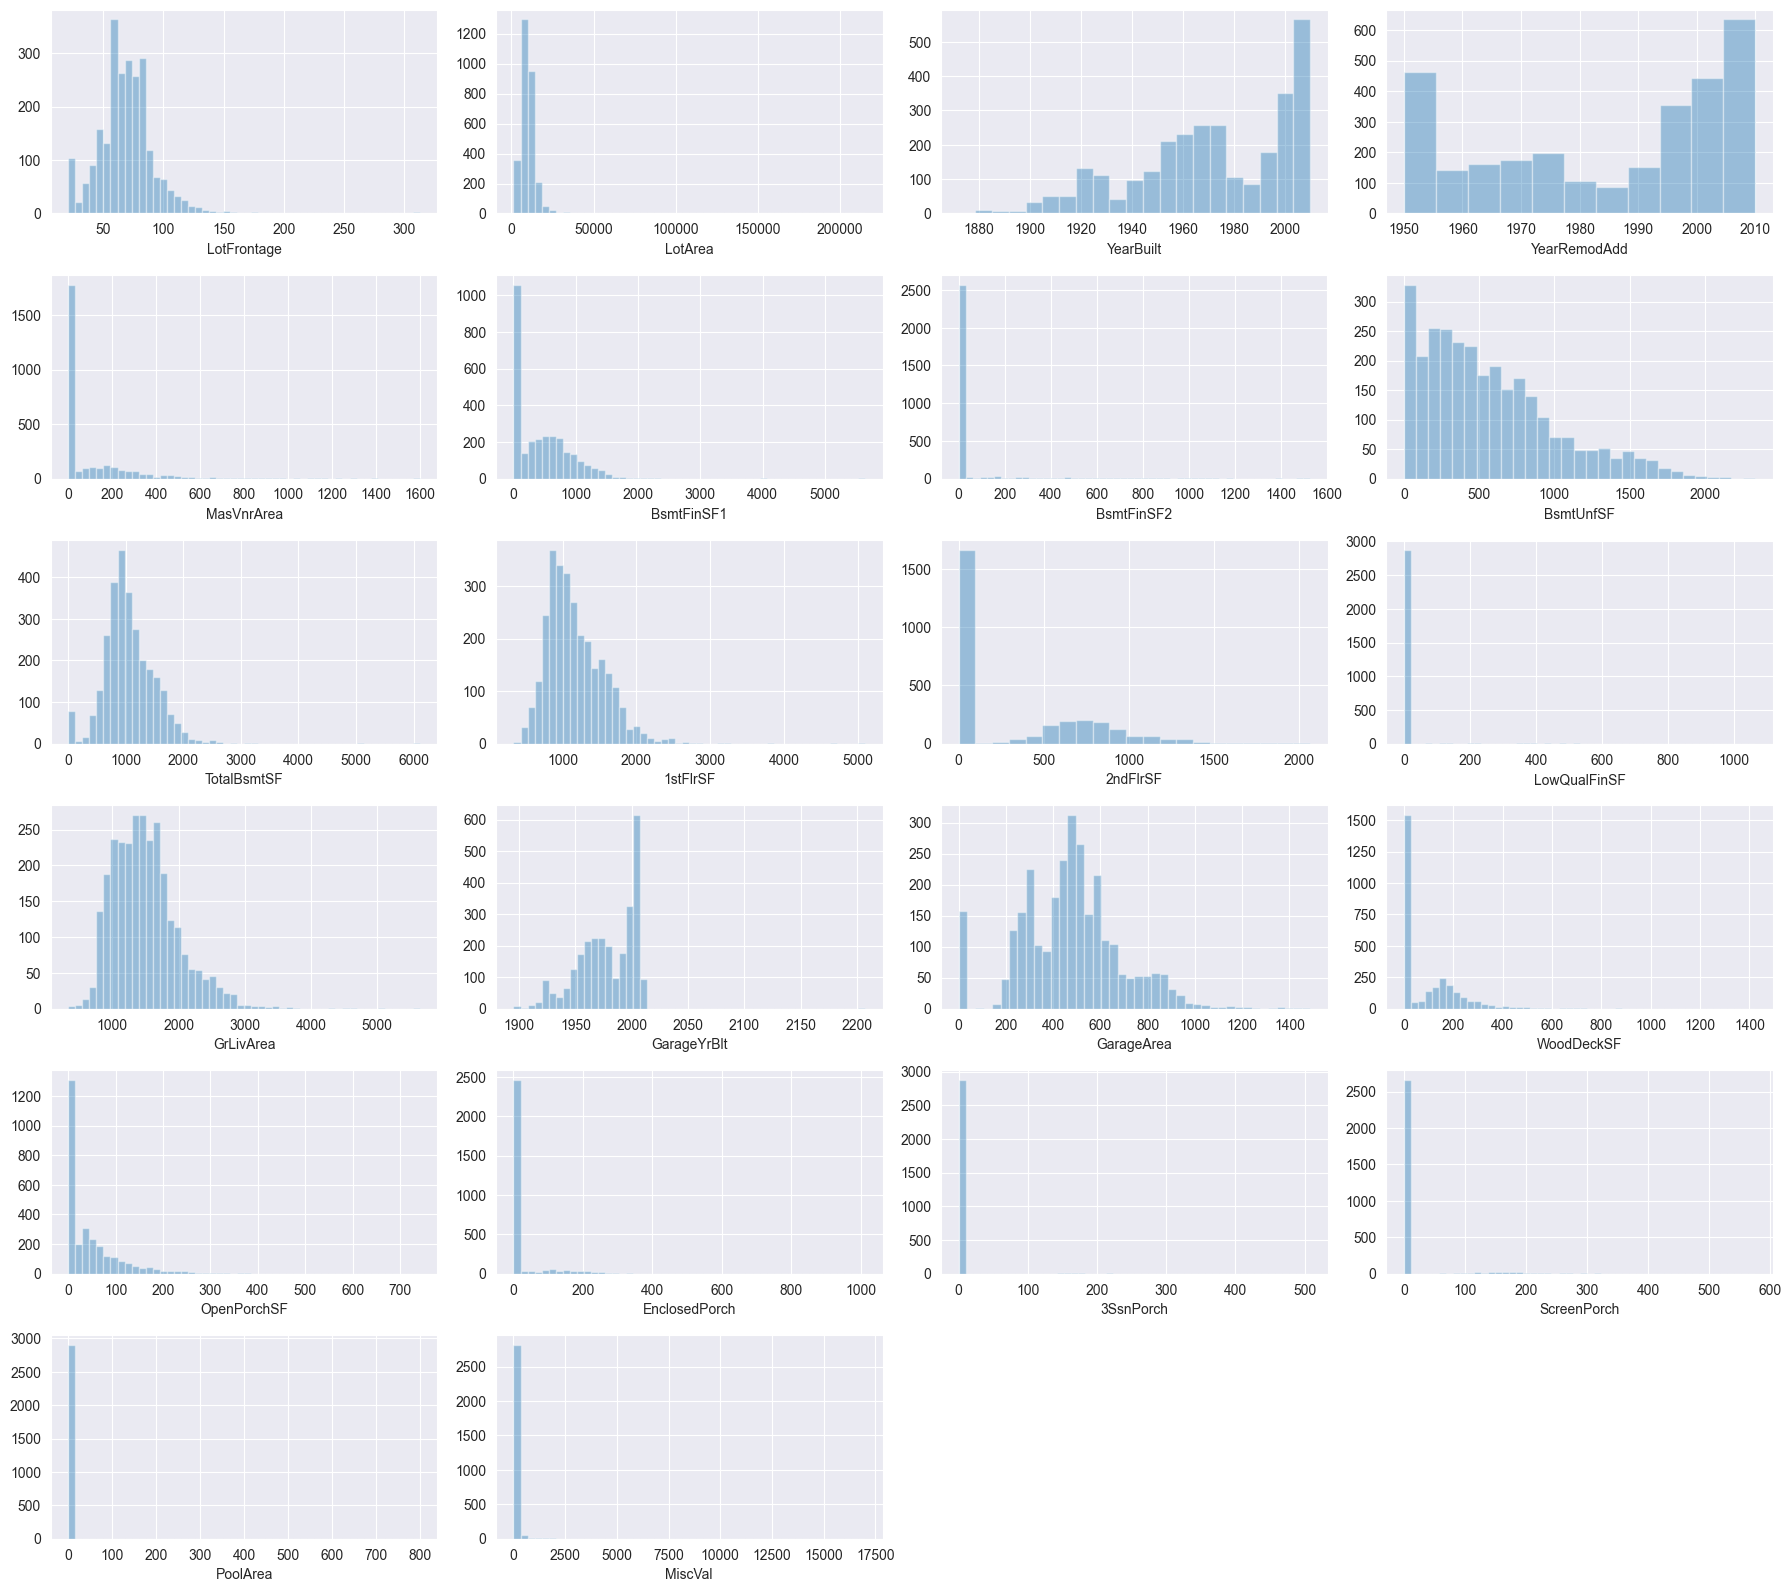

In [144]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
from sklearn.impute import SimpleImputer


fig = plt.figure(figsize=(18,16))
for index,col in enumerate(cont_num_var):
    plt.subplot(6,4,index+1)
    sns.distplot(numeric_.loc[:,col].dropna(), kde=False)
fig.tight_layout(pad=1.0)

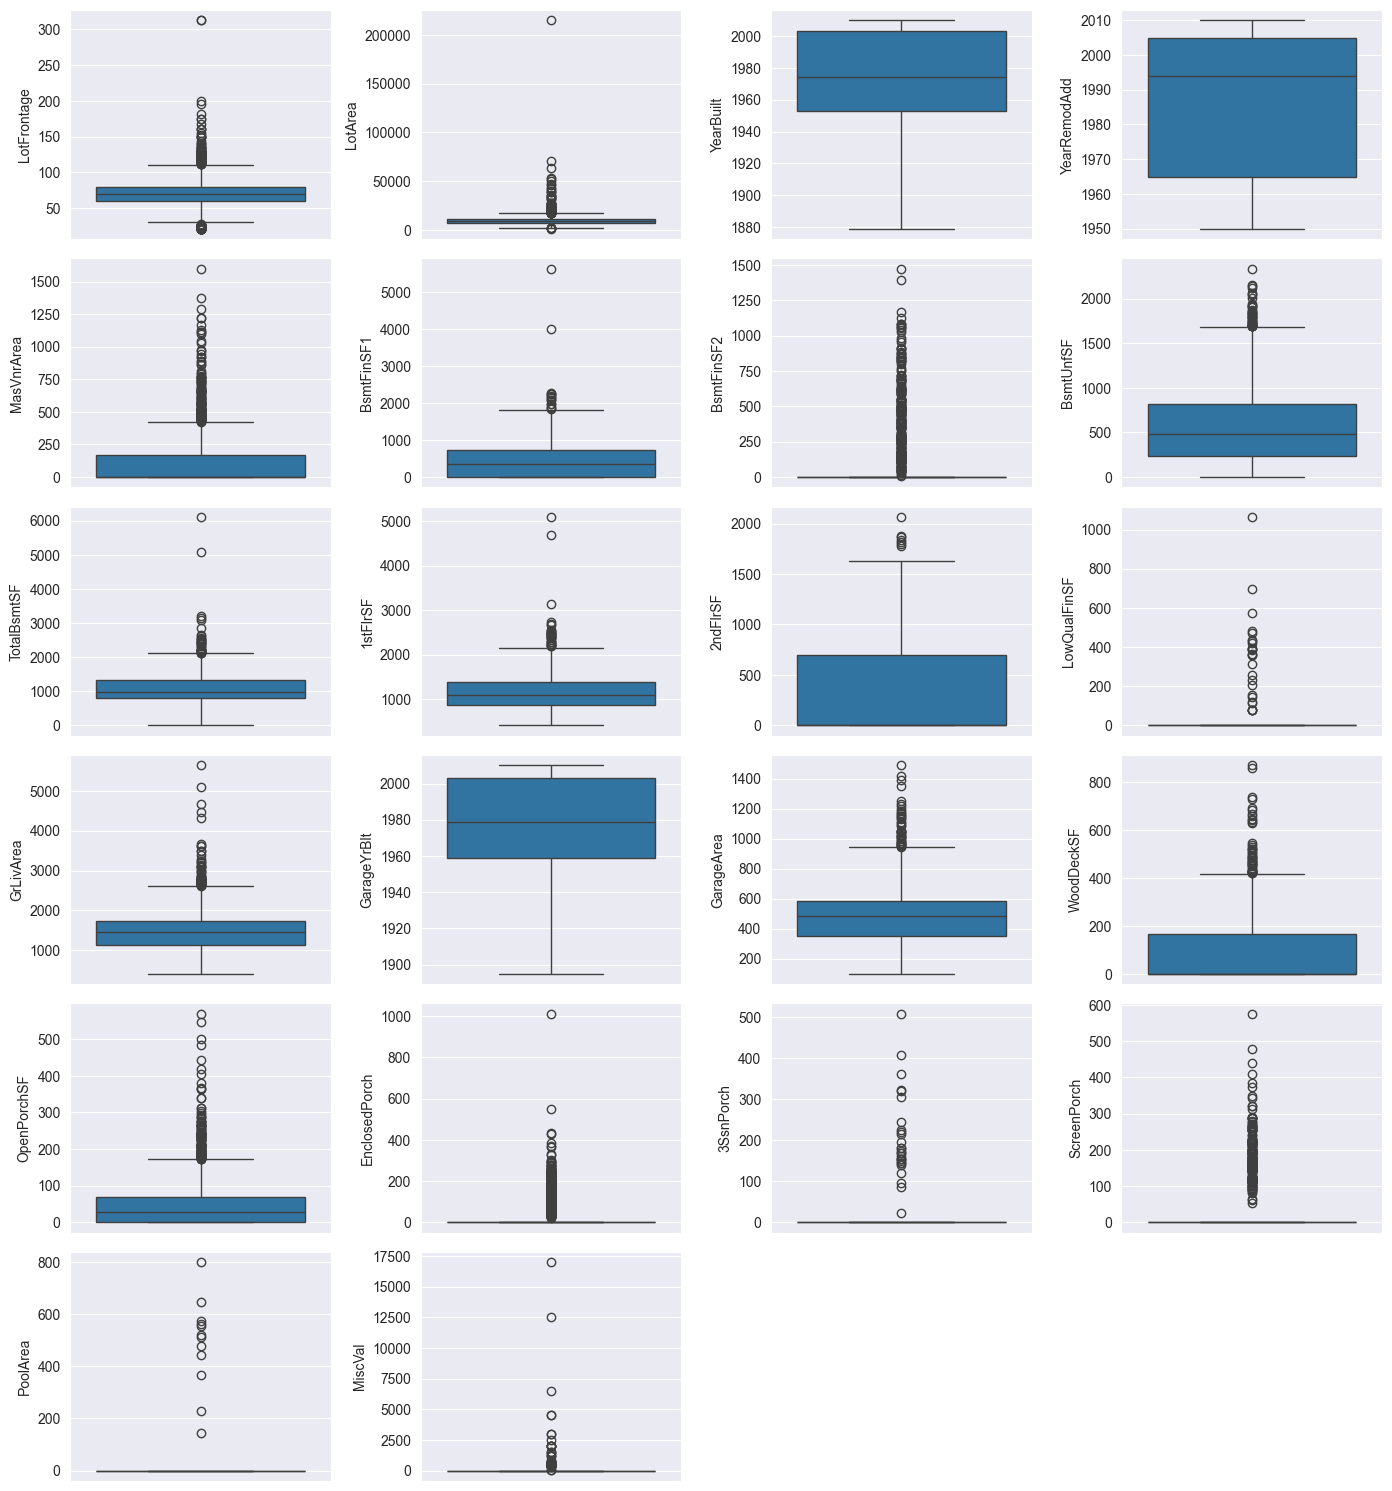

In [145]:
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(cont_num_var):
    plt.subplot(6,4,index+1)
    sns.boxplot(y=col, data=numeric_.dropna())
fig.tight_layout(pad=1.0)

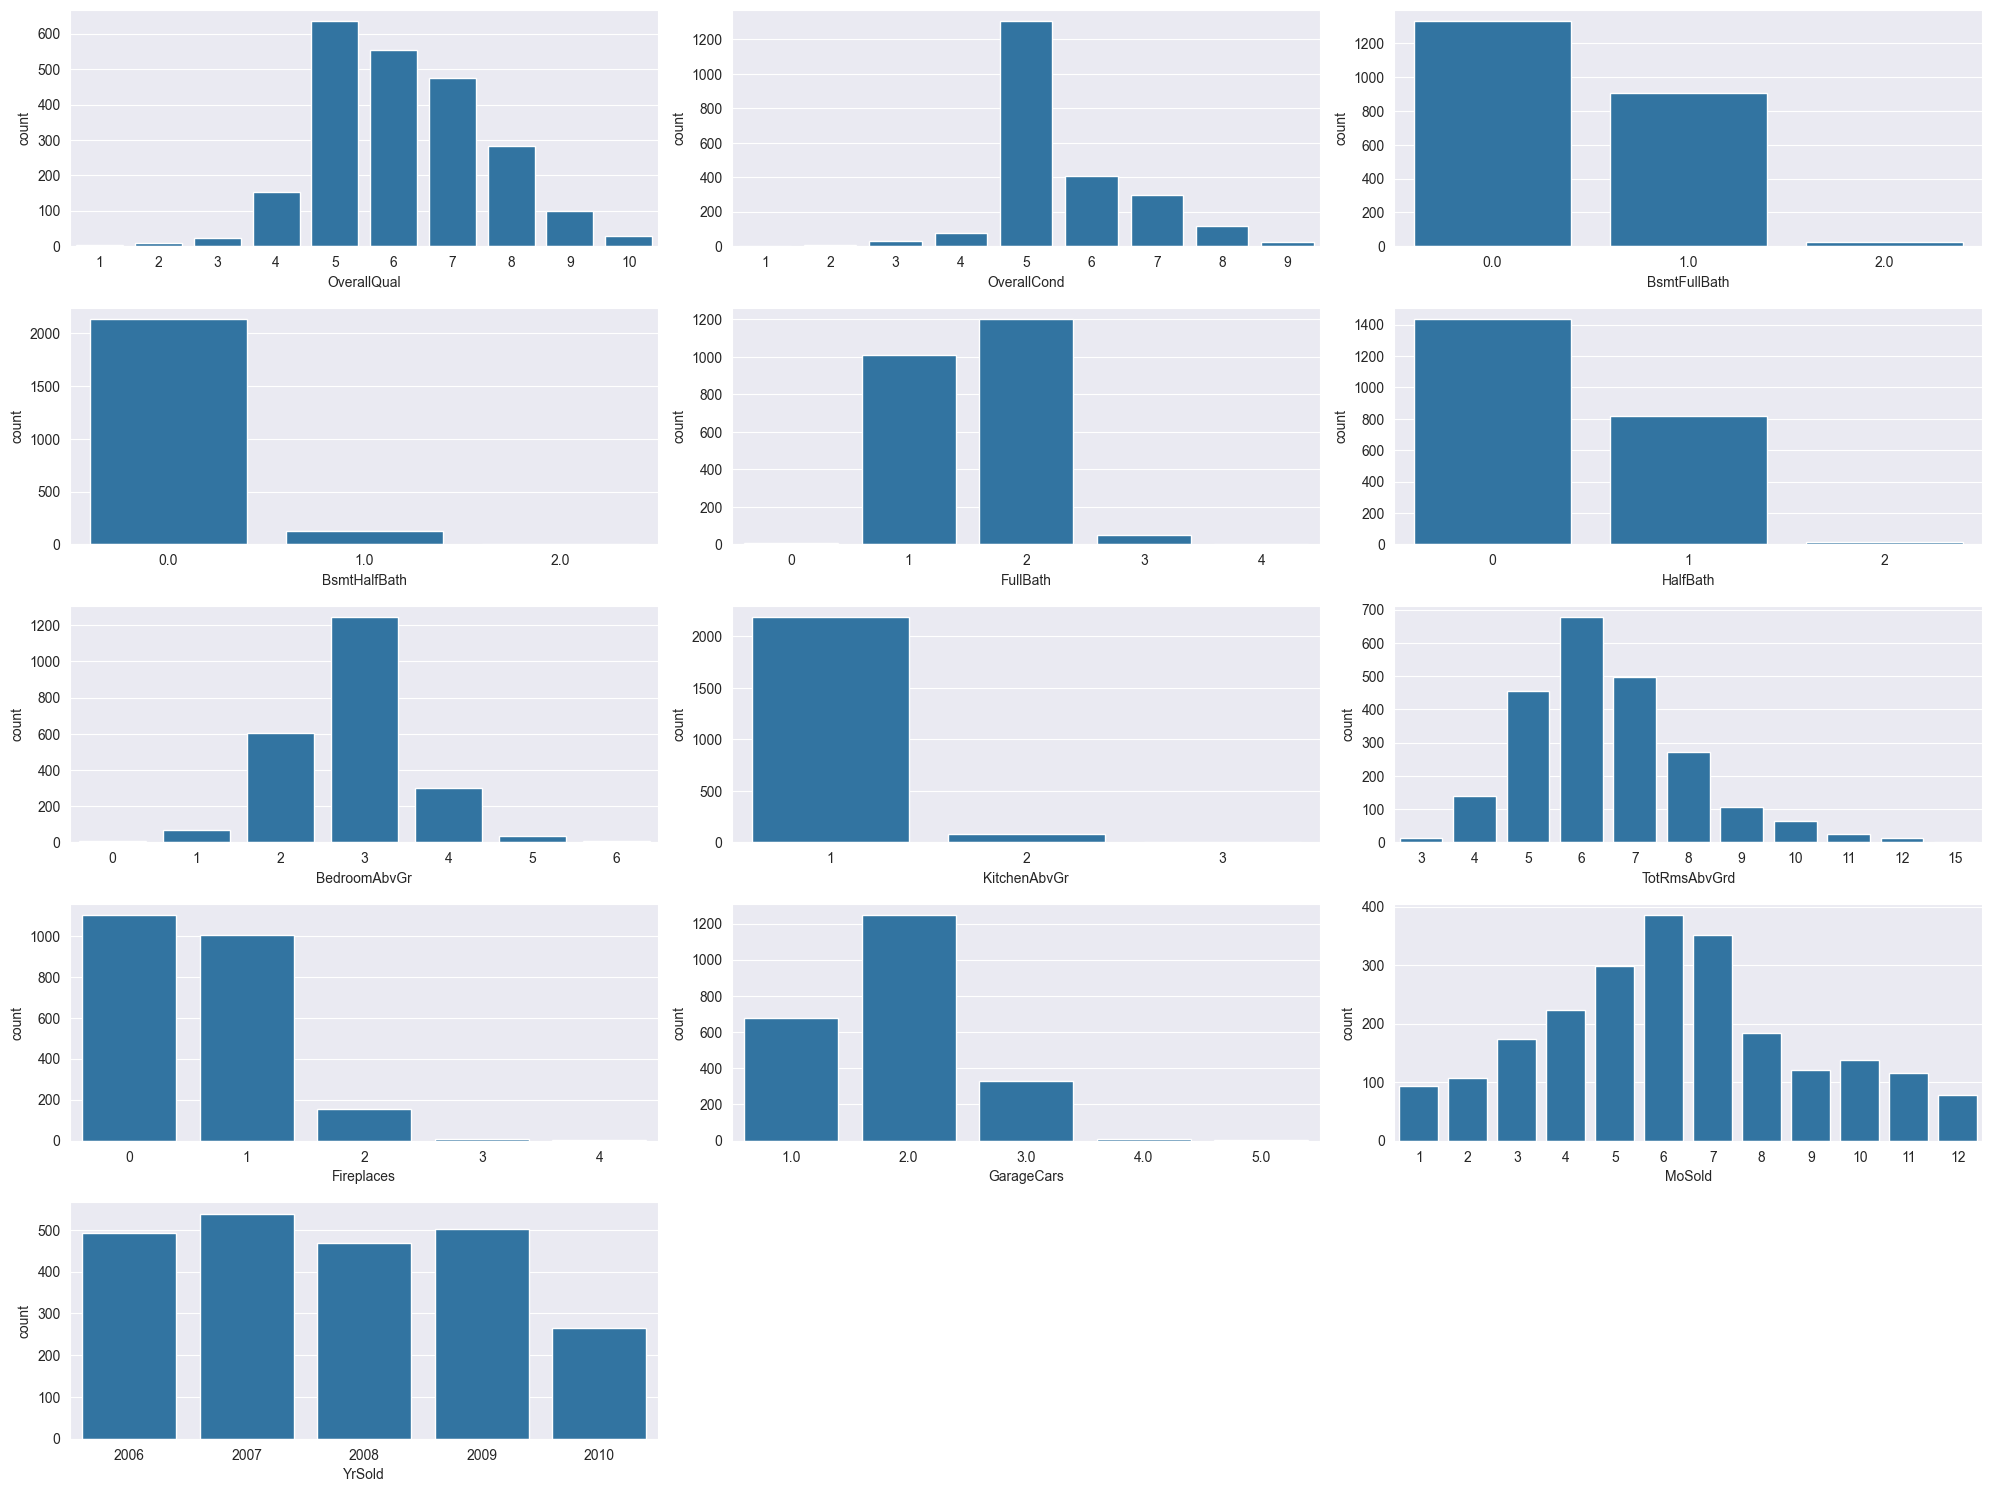

In [146]:
fig = plt.figure(figsize=(20,15))
for index,col in enumerate(disc_num_var):
    plt.subplot(5,3,index+1)
    sns.countplot(x=col, data=numeric_.dropna())
fig.tight_layout(pad=1.0)

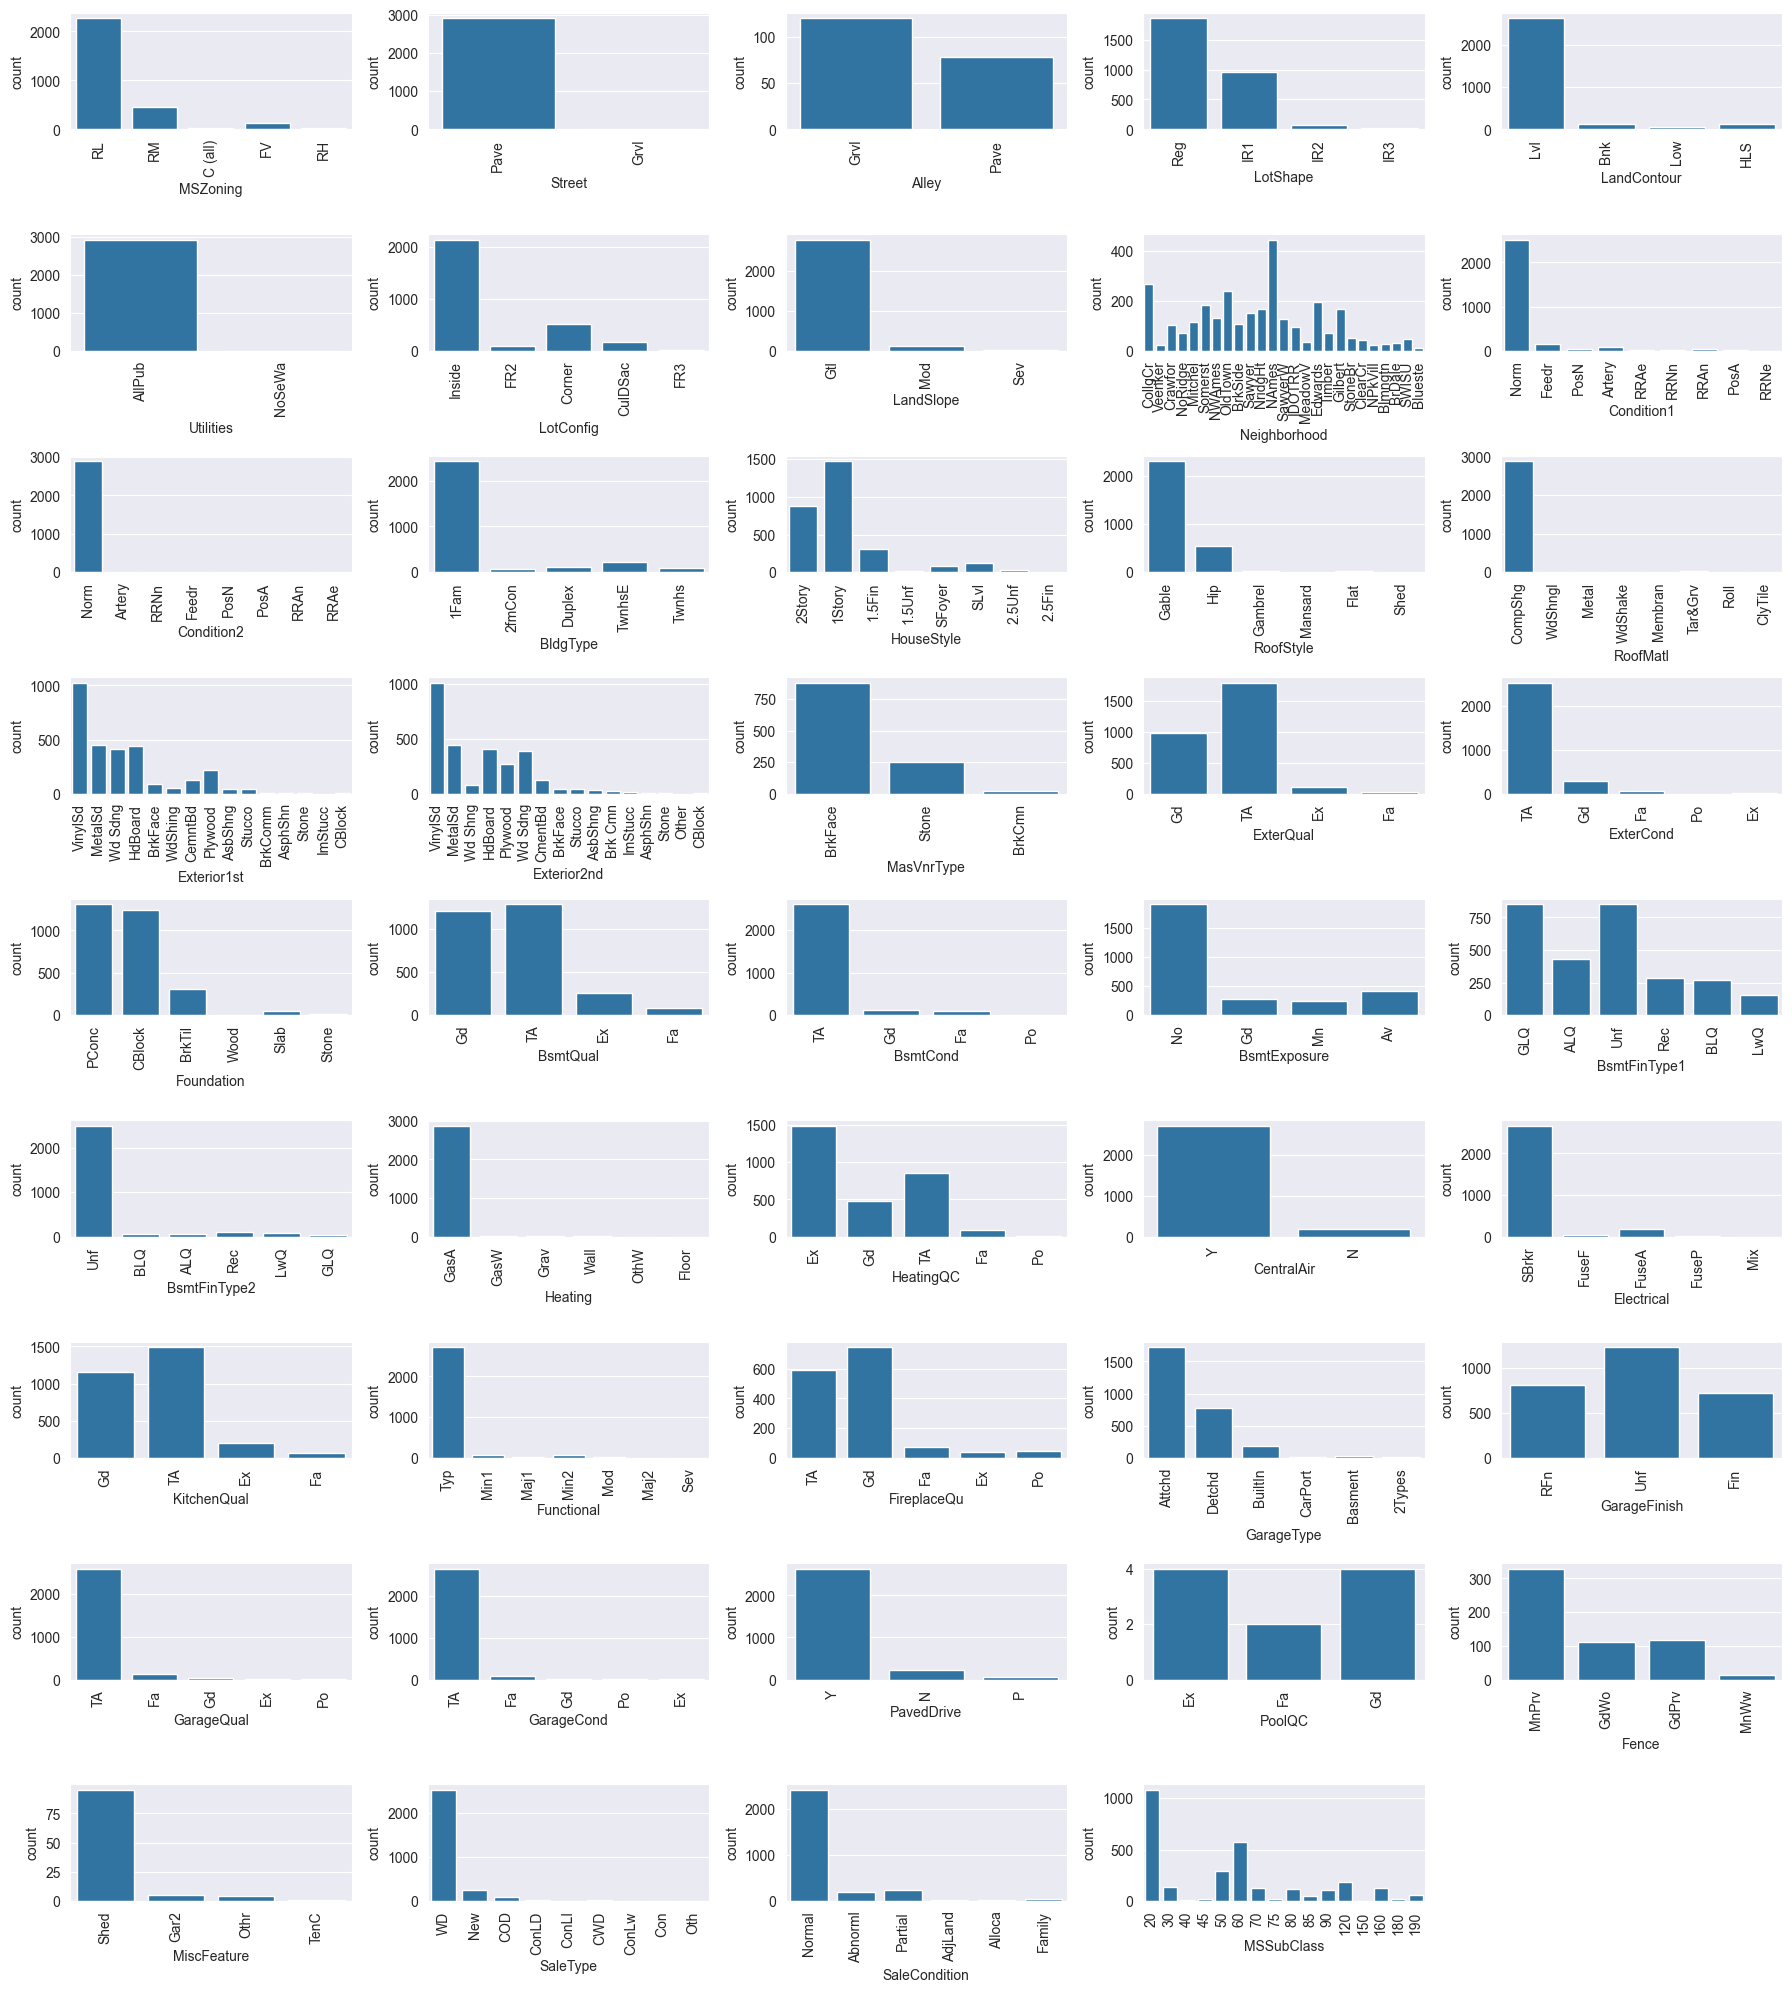

In [147]:
fig = plt.figure(figsize=(18,20))
cat_train_clean = cat_train.dropna()

for index in range(len(cat_train.columns)):
    plt.subplot(9,5,index+1)
    sns.countplot(x=cat_train.iloc[:,index], data=cat_train_clean)
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

<Axes: >

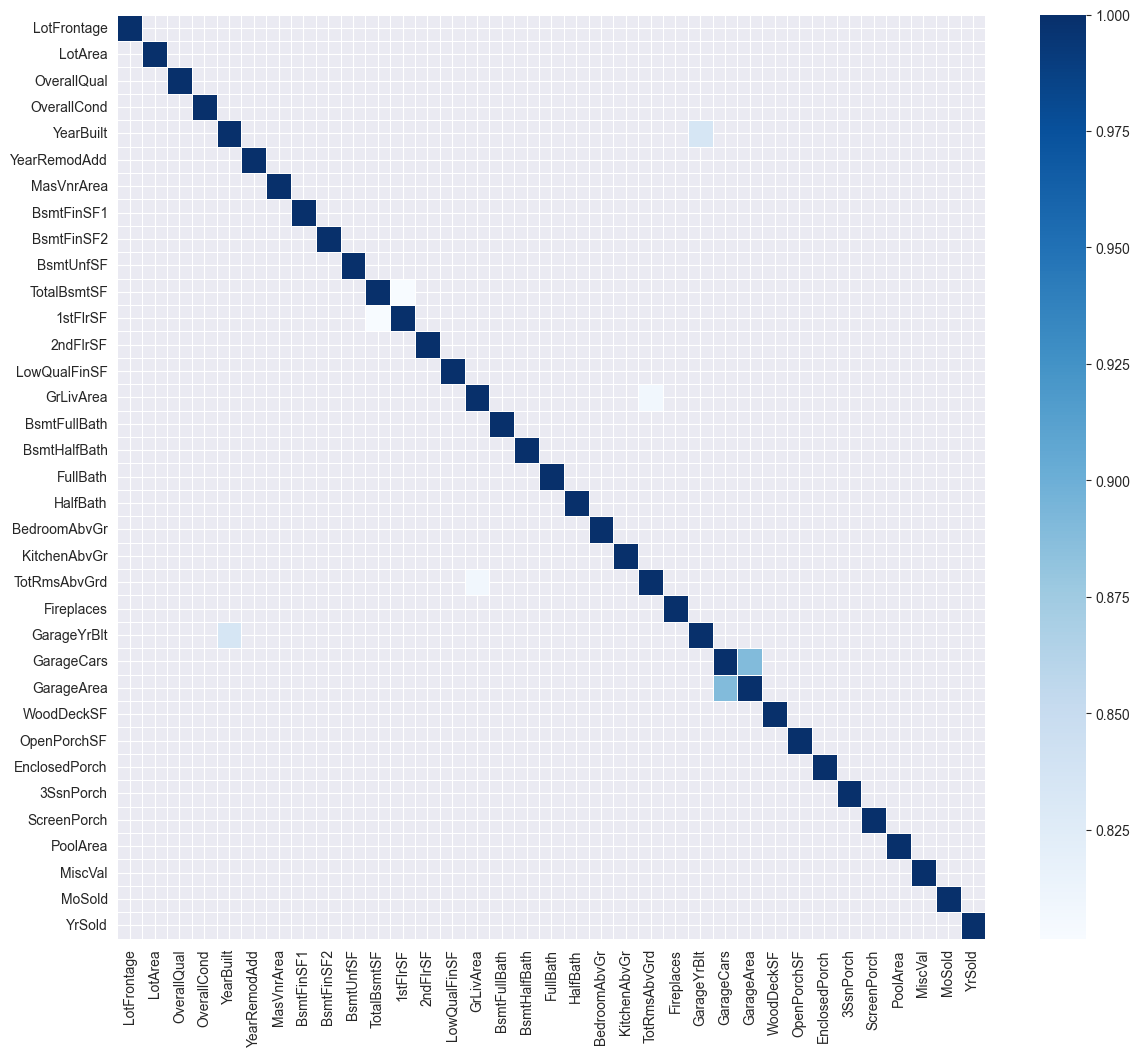

In [148]:
plt.figure(figsize=(14,12))
correlation = numeric_.corr()
sns.heatmap(correlation, mask = correlation <0.8, linewidth=0.5, cmap='Blues')

In [149]:
numeric_train = train.select_dtypes(exclude=['object'])
correlation = numeric_train.corr()
correlation[['SalePrice']].sort_values(['SalePrice'], ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


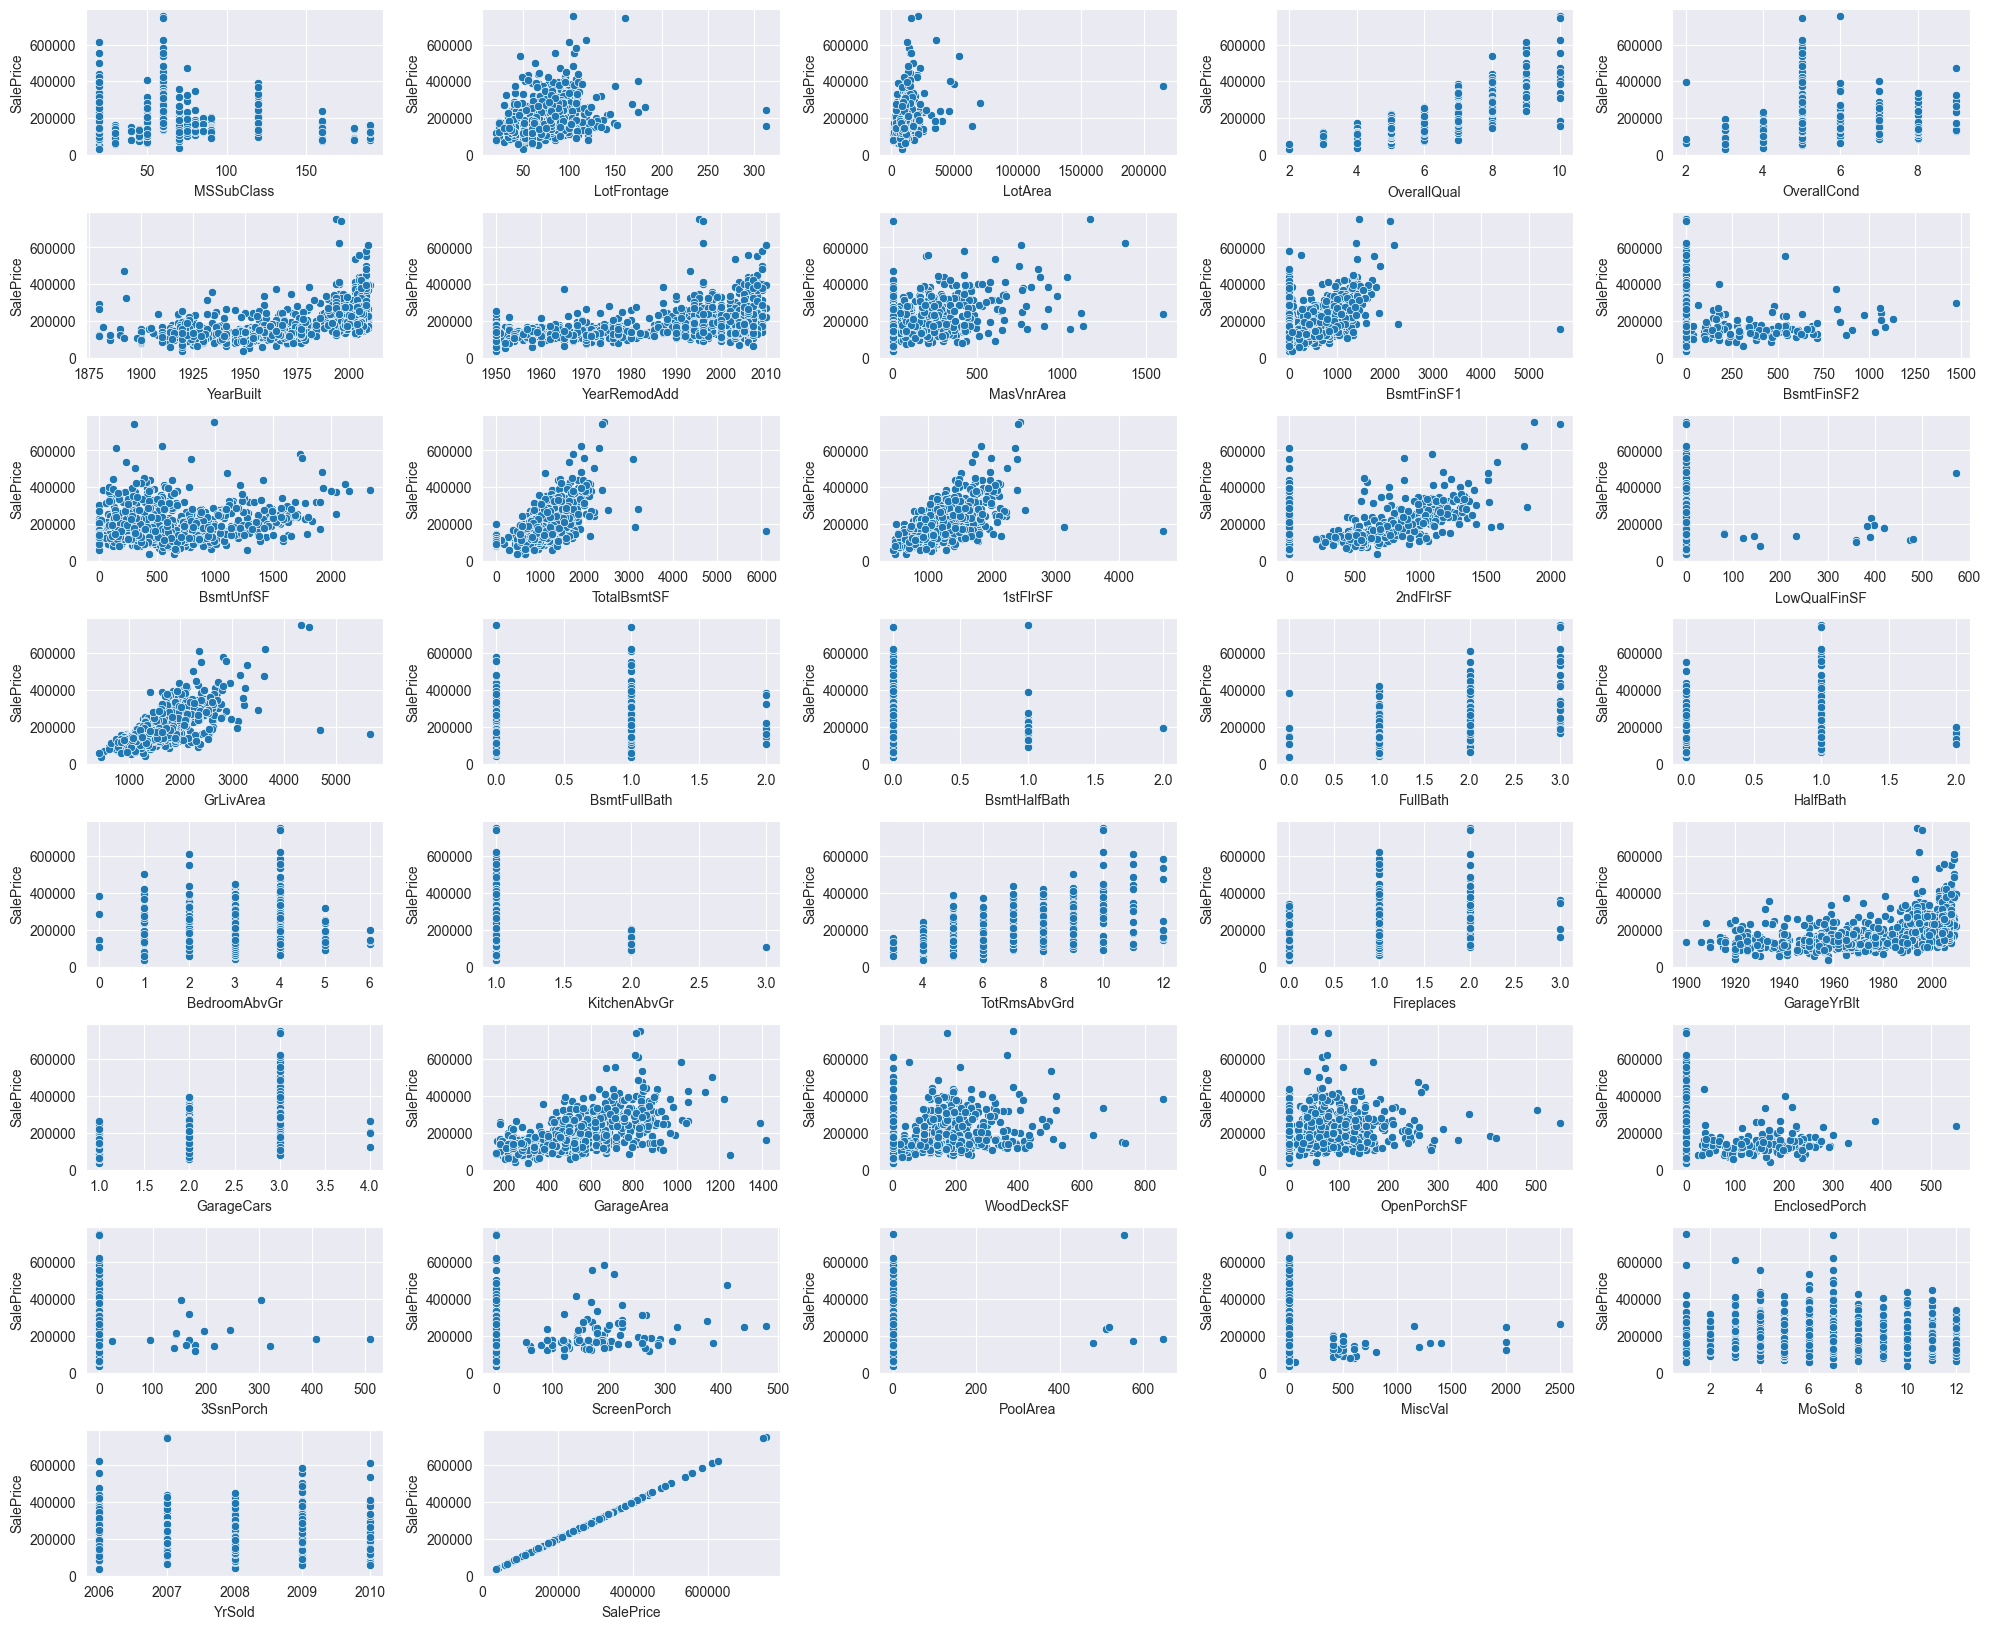

In [150]:
numeric_train_dropna = numeric_train.dropna()
fig = plt.figure(figsize=(20,20))
for index in range(len(numeric_train.columns)):
    plt.subplot(10,5,index+1)
    sns.scatterplot(x=numeric_train.iloc[:,index], y='SalePrice', data=numeric_train_dropna)
fig.tight_layout(pad=1.0)

In [151]:
X.drop(['GarageYrBlt', 'TotRmsAbvGrd', '1stFlrSF', 'GarageCars'], axis=1, inplace=True)










<Axes: title={'center': 'Number of missing rows'}, xlabel='features', ylabel='sum'>

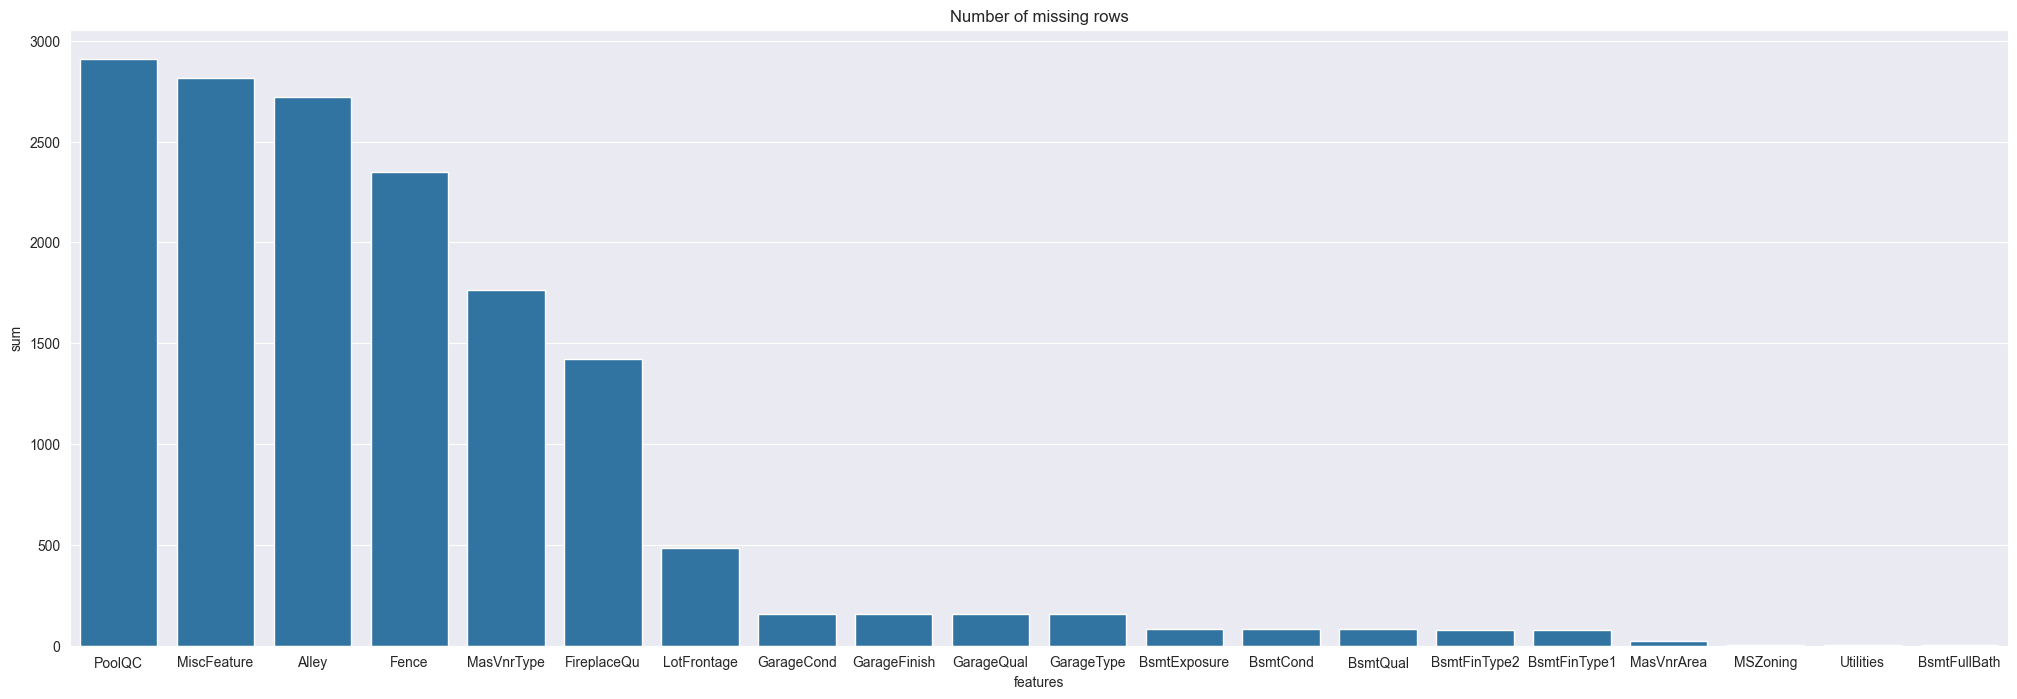

In [152]:
plt.figure(figsize=(25,8))
plt.title('Number of missing rows')
missing_count = pd.DataFrame(X.isnull().sum(), columns=['sum']).sort_values(by=['sum'],ascending=False).head(20).reset_index()
missing_count.columns = ['features','sum']
sns.barplot(x='features',y='sum', data = missing_count)

In [153]:
X.drop(['Alley', 'PoolQC', 'MiscFeature'], axis=1, inplace=True)

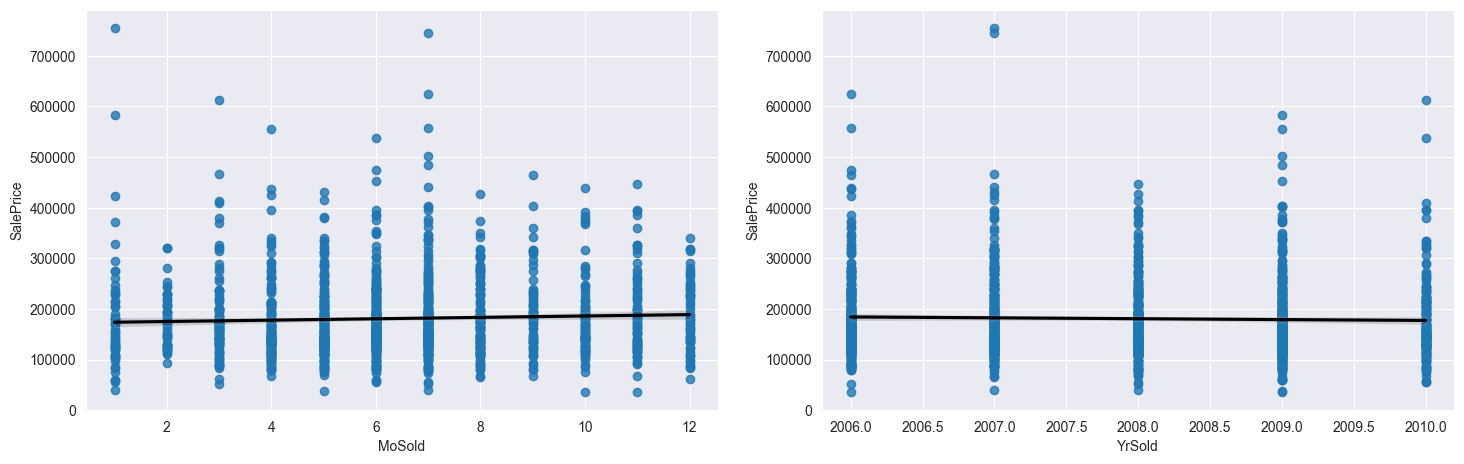

In [154]:
fig,axes = plt.subplots(1,2, figsize=(15,5))
sns.regplot(x=numeric_train['MoSold'], y='SalePrice', data=numeric_train, ax = axes[0], line_kws={'color':'black'})
sns.regplot(x=numeric_train['YrSold'], y='SalePrice', data=numeric_train, ax = axes[1],line_kws={'color':'black'})
fig.tight_layout(pad=2.0)

In [155]:
correlation[['SalePrice']].sort_values(['SalePrice'], ascending=False).tail(10)

,SalePrice
3SsnPorch,0.044584
BsmtFinSF2,-0.011378
BsmtHalfBath,-0.016844
MiscVal,-0.021190
LowQualFinSF,-0.025606
YrSold,-0.028923
OverallCond,-0.077856
MSSubClass,-0.084284
EnclosedPorch,-0.128578
KitchenAbvGr,-0.135907


In [156]:
X.drop(['MoSold', 'YrSold'], axis=1, inplace=True)











In [157]:
cat_col = X.select_dtypes(include=['object']).columns
overfit_cat = []
for i in cat_col:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 96:
        overfit_cat.append(i)
overfit_cat = list(overfit_cat)
print(overfit_cat)
X = X.drop(overfit_cat, axis=1)
print(X.shape)

['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating']
(2919, 65)


In [158]:
num_col = X.select_dtypes(exclude=['object']).drop(['MSSubClass'], axis=1).columns
overfit_num = []
for i in num_col:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 96:
        overfit_num.append(i)
overfit_num = list(overfit_num)
print(overfit_num)
X = X.drop(overfit_num, axis=1)
print(X.shape)

['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal']
(2919, 61)


In [159]:
print(X.shape)
print(X.info())
print(X.head())
print(X.columns)
print(X.index)


(2919, 61)
<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   LotShape       2919 non-null   object 
 5   LandContour    2919 non-null   object 
 6   LotConfig      2919 non-null   object 
 7   LandSlope      2919 non-null   object 
 8   Neighborhood   2919 non-null   object 
 9   Condition1     2919 non-null   object 
 10  BldgType       2919 non-null   object 
 11  HouseStyle     2919 non-null   object 
 12  OverallQual    2919 non-null   int64  
 13  OverallCond    2919 non-null   int64  
 14  YearBuilt      2919 non-null   int64  
 15  YearRemodAdd   2919 non-null   int64  
 16  RoofStyle      2919 non-null   object 
 17  Exterior1st    2918 non-null   object 
 18  Ex

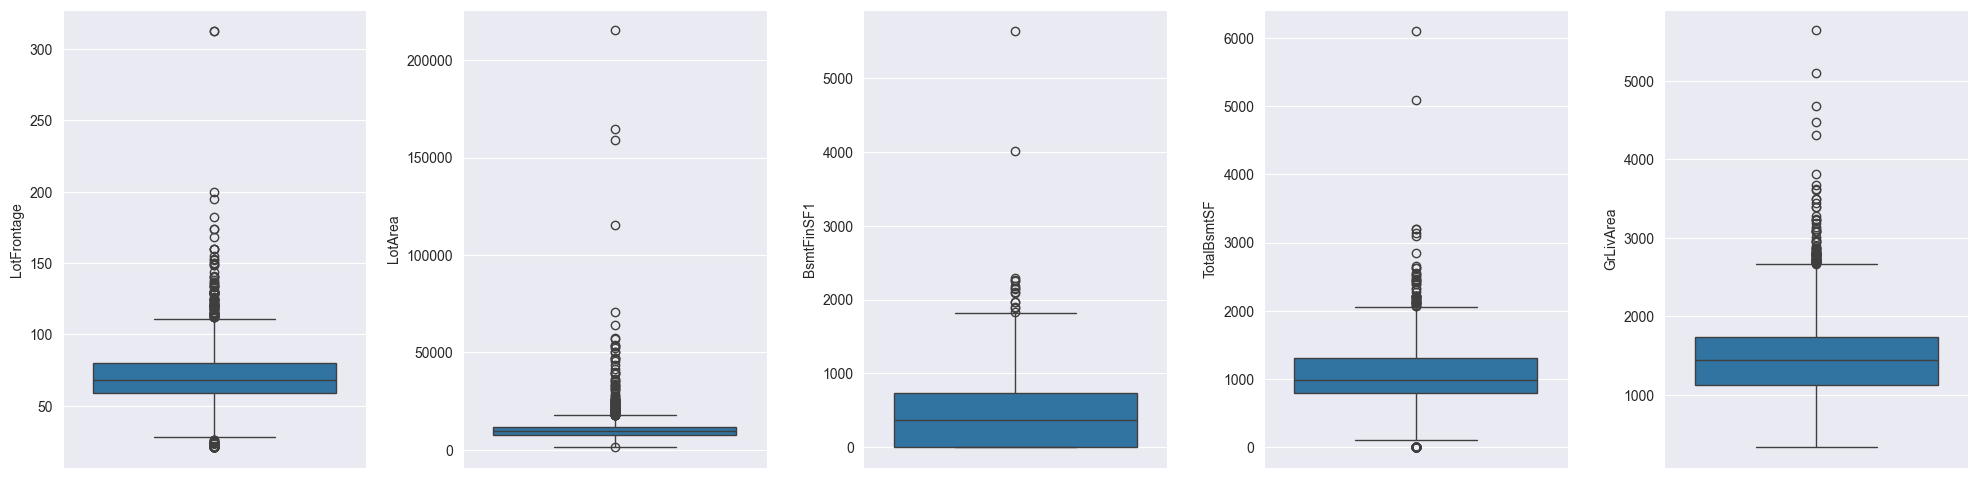

In [160]:
out_col = ['LotFrontage','LotArea','BsmtFinSF1','TotalBsmtSF','GrLivArea']
fig = plt.figure(figsize=(20,5))
for index,col in enumerate(out_col):
    plt.subplot(1,5,index+1)
    sns.boxplot(y=col, data=X)
fig.tight_layout(pad=1.5)

In [161]:
train = train.drop(train[train['LotFrontage'] > 200].index)
train = train.drop(train[train['LotArea'] > 100000].index)
train = train.drop(train[train['BsmtFinSF1'] > 4000].index)
train = train.drop(train[train['TotalBsmtSF'] > 5000].index)
train = train.drop(train[train['GrLivArea'] > 4000].index)

In [162]:
print(train.shape)
print(train.info())
print(train.head())
print(train.columns)


(1451, 80)
<class 'pandas.core.frame.DataFrame'>
Index: 1451 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   object 
 2   LotFrontage    1195 non-null   float64
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1451 non-null   object 
 7   LandContour    1451 non-null   object 
 8   Utilities      1451 non-null   object 
 9   LotConfig      1451 non-null   object 
 10  LandSlope      1451 non-null   object 
 11  Neighborhood   1451 non-null   object 
 12  Condition1     1451 non-null   object 
 13  Condition2     1451 non-null   object 
 14  BldgType       1451 non-null   object 
 15  HouseStyle     1451 non-null   object 
 16  OverallQual    1451 non-null   int64  
 17  OverallCond    1451 non-null   int64  
 18  Ye

In [163]:
X.shape

(2919, 61)

In [165]:
pd.DataFrame(X.isnull().sum(), columns=['sum']).sort_values(by=['sum'],ascending=False).head(15)

,sum
Fence,2348
MasVnrType,1766
FireplaceQu,1420
LotFrontage,486
GarageCond,159
GarageQual,159
GarageFinish,159
GarageType,157
BsmtExposure,82
BsmtCond,82


In [166]:
cat = ['GarageType','GarageFinish','BsmtFinType2','BsmtExposure','BsmtFinType1', 
       'GarageCond','GarageQual','BsmtCond','BsmtQual','FireplaceQu','Fence',"KitchenQual",
       "HeatingQC",'ExterQual','ExterCond']

X[cat] = X[cat].fillna("NA")

In [168]:
#categorical
cols = ["MasVnrType", "MSZoning", "Exterior1st", "Exterior2nd", "SaleType", "Electrical", "Functional"]
X[cols] = X.groupby("Neighborhood")[cols].transform(    lambda x: x.fillna(x.mode().iloc[0] if len(x.mode()) > 0 else x.mode())
)

C:\Users\qing.tang\AppData\Local\Temp\ipykernel_10732\3108840584.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[cols] = X.groupby("Neighborhood")[cols].transform(    lambda x: x.fillna(x.mode().iloc[0] if len(x.mode()) > 0 else x.mode())


In [169]:
print("Mean of LotFrontage: ", X['LotFrontage'].mean())
print("Mean of GarageArea: ", X['GarageArea'].mean())

Mean of LotFrontage:  69.30579531442663
Mean of GarageArea:  472.8745716244003


In [170]:
neigh_lot = X.groupby("Neighborhood")["LotFrontage"].mean().reset_index(name = 'LotFrontage_mean')
neigh_garage = X.groupby("Neighborhood")["GarageArea"].mean().reset_index(name = 'GarageArea_mean')

<Axes: xlabel='Neighborhood', ylabel='GarageArea_mean'>

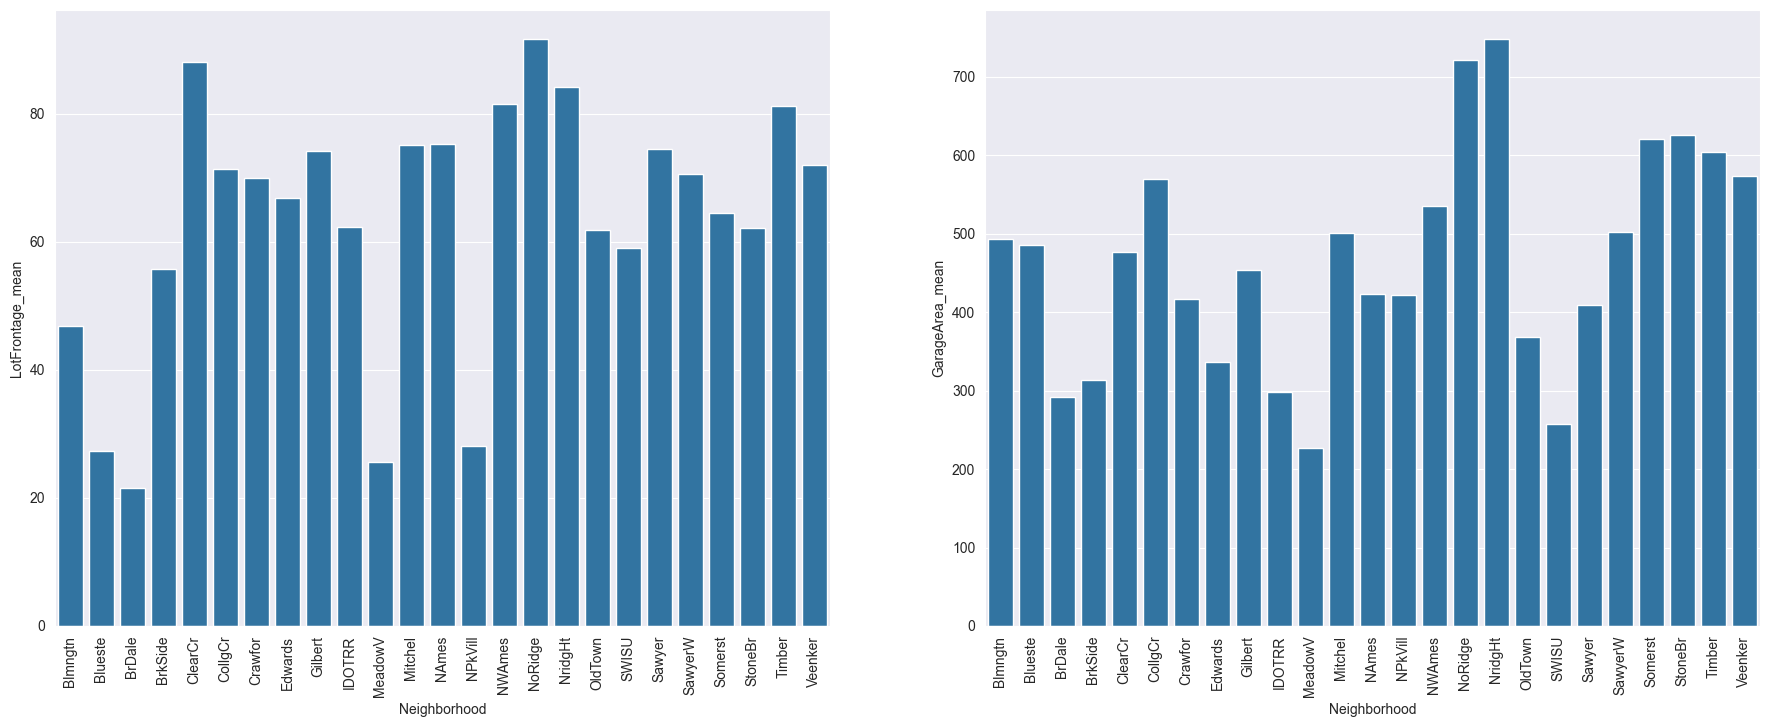

In [171]:
fig, axes = plt.subplots(1,2,figsize=(22,8))
axes[0].tick_params(axis='x', rotation=90)
sns.barplot(x='Neighborhood', y='LotFrontage_mean', data=neigh_lot, ax=axes[0])
axes[1].tick_params(axis='x', rotation=90)
sns.barplot(x='Neighborhood', y='GarageArea_mean', data=neigh_garage, ax=axes[1])

In [172]:
X['LotFrontage'] = X.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))
X['GarageArea'] = X.groupby('Neighborhood')['GarageArea'].transform(lambda x: x.fillna(x.mean()))
X['MSZoning'] = X.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))


In [173]:
cont = ["BsmtHalfBath", "BsmtFullBath", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "MasVnrArea"]
X[cont] = X[cont].fillna(X[cont].mean())










In [174]:
X.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,TA,TA,Y,0,61,0,0,NA,WD,Normal
2,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,TA,TA,Y,298,0,0,0,NA,WD,Normal
3,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,TA,TA,Y,0,42,0,0,NA,WD,Normal
4,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,TA,TA,Y,0,35,272,0,NA,WD,Abnorml
5,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,TA,TA,Y,192,84,0,0,NA,WD,Normal


In [175]:
X['MSSubClass'] = X['MSSubClass'].astype(str)

In [176]:
ordinal_map = {'Ex': 5,'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA':0}
fintype_map = {'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1, 'NA': 0}
expose_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
fence_map = {'GdPrv': 4,'MnPrv': 3,'GdWo': 2, 'MnWw': 1,'NA': 0}

In [178]:
ord_col = ['ExterQual','ExterCond','BsmtQual', 'BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond', 'FireplaceQu']
for col in ord_col:
    print(col, X[col].value_counts())
    X[col] = X[col].map(ordinal_map)

fin_col = ['BsmtFinType1', 'BsmtFinType2']
for col in fin_col:
    print(col, X[col].value_counts())
    X[col] = X[col].map(fintype_map)

X['BsmtExposure'] = X['BsmtExposure'].map(expose_map)
X['Fence'] = X['Fence'].map(fence_map)









ExterQual ExterQual
TA    1798
Gd     979
Ex     107
Fa      35
Name: count, dtype: int64
ExterCond ExterCond
TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: count, dtype: int64
BsmtQual BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
NA      81
Name: count, dtype: int64
BsmtCond BsmtCond
TA    2606
Gd     122
Fa     104
NA      82
Po       5
Name: count, dtype: int64
HeatingQC HeatingQC
Ex    1493
TA     857
Gd     474
Fa      92
Po       3
Name: count, dtype: int64
KitchenQual KitchenQual
TA    1492
Gd    1151
Ex     205
Fa      70
NA       1
Name: count, dtype: int64
GarageQual GarageQual
TA    2604
NA     159
Fa     124
Gd      24
Po       5
Ex       3
Name: count, dtype: int64
GarageCond GarageCond
TA    2654
NA     159
Fa      74
Gd      15
Po      14
Ex       3
Name: count, dtype: int64
FireplaceQu FireplaceQu
NA    1420
Gd     744
TA     592
Fa      74
Po      46
Ex      43
Name: count, dtype: int64
BsmtFinType1 BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Re

In [179]:
X['TotalLot'] = X['LotFrontage'] + X['LotArea']
X['TotalBsmtFin'] = X['BsmtFinSF1'] + X['BsmtFinSF2']
X['TotalSF'] = X['TotalBsmtSF'] + X['2ndFlrSF']
X['TotalBath'] = X['FullBath'] + X['HalfBath']
X['TotalPorch'] = X['OpenPorchSF'] + X['EnclosedPorch'] + X['ScreenPorch']

In [180]:
colum = ['MasVnrArea','TotalBsmtFin','TotalBsmtSF','2ndFlrSF','WoodDeckSF','TotalPorch']
for col in colum:
    col_name= col + '_bin'
    X[col_name] = X[col].apply(lambda x: 1 if x > 0 else 0)










In [181]:
X= pd.get_dummies(X)

In [182]:
print(X.shape)
print(X.info())
print(X.head())
print(X.columns)
print(X.index)


(2919, 222)
<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Columns: 222 entries, LotFrontage to SaleCondition_Partial
dtypes: bool(173), float64(12), int64(37)
memory usage: 1.6 MB
None
    LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                            
1          65.0     8450            7            5       2003          2003   
2          80.0     9600            6            8       1976          1976   
3          68.0    11250            7            5       2001          2002   
4          60.0     9550            7            5       1915          1970   
5          84.0    14260            8            5       2000          2000   

    MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  SaleType_ConLw  \
Id                                              ...                   
1        196.0          4          3         4  ...           False   
2          0.0          3

C:\Users\qing.tang\AppData\Local\Temp\ipykernel_10732\1102952382.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dist = sns.distplot(train['SalePrice'],norm_hist=False)


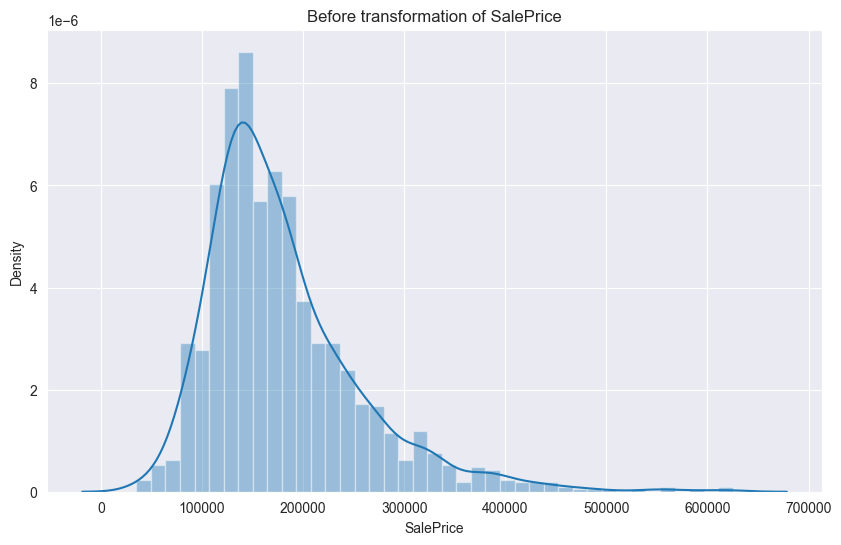

In [183]:

plt.figure(figsize=(10,6))
plt.title("Before transformation of SalePrice")
dist = sns.distplot(train['SalePrice'],norm_hist=False)

C:\Users\qing.tang\AppData\Local\Temp\ipykernel_10732\3788850065.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dist = sns.distplot(np.log(train['SalePrice']),norm_hist=False)


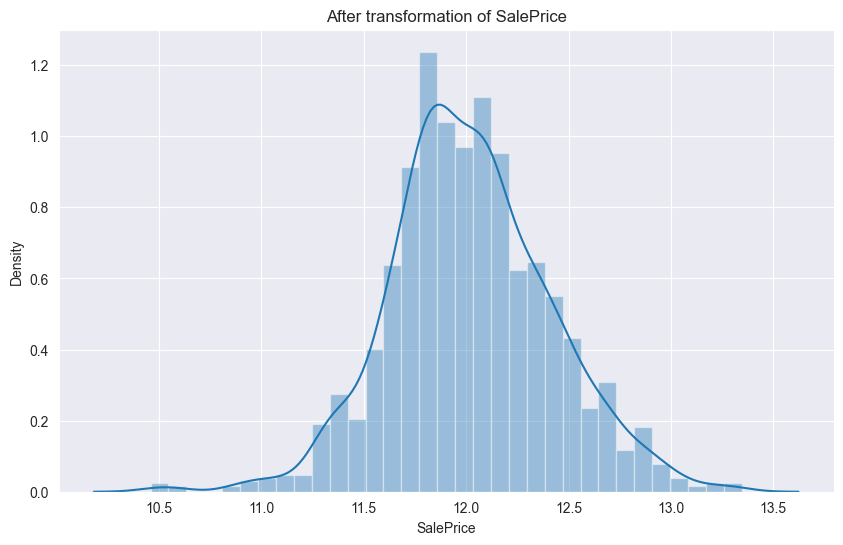

In [184]:

plt.figure(figsize=(10,6))
plt.title("After transformation of SalePrice")
dist = sns.distplot(np.log(train['SalePrice']),norm_hist=False)

In [185]:
y["SalePrice"] = np.log(y['SalePrice'])


In [186]:
x = X.loc[train.index]
print(x.shape)
print(x.info())
print(x.head())
print(x.columns)
print(x.index)

(1451, 222)
<class 'pandas.core.frame.DataFrame'>
Index: 1451 entries, 1 to 1460
Columns: 222 entries, LotFrontage to SaleCondition_Partial
dtypes: bool(173), float64(12), int64(37)
memory usage: 811.9 KB
None
    LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                            
1          65.0     8450            7            5       2003          2003   
2          80.0     9600            6            8       1976          1976   
3          68.0    11250            7            5       2001          2002   
4          60.0     9550            7            5       1915          1970   
5          84.0    14260            8            5       2000          2000   

    MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  SaleType_ConLw  \
Id                                              ...                   
1        196.0          4          3         4  ...           False   
2          0.0         

In [187]:
y = y.loc[train.index]

In [188]:
test = X.loc[test.index]
print(test.shape)
print(test.info())
print(test.head())
print(test.columns)
print(test.index)

(1459, 222)
<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 1461 to 2919
Columns: 222 entries, LotFrontage to SaleCondition_Partial
dtypes: bool(173), float64(12), int64(37)
memory usage: 816.4 KB
None
      LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                              
1461         80.0    11622            5            6       1961          1961   
1462         81.0    14267            6            6       1958          1958   
1463         74.0    13830            5            5       1997          1998   
1464         78.0     9978            6            6       1998          1998   
1465         43.0     5005            8            5       1992          1992   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  SaleType_ConLw  \
Id                                                ...                   
1461         0.0          3          3         3  ...           False   


In [189]:
from sklearn.preprocessing import RobustScaler

cols = x.select_dtypes(np.number).columns
transformer = RobustScaler().fit(x[cols])
x[cols] = transformer.transform(x[cols])
test[cols] = transformer.transform(test[cols])

In [190]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=2020)

In [192]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn import ensemble
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor

In [193]:
xgb = XGBRegressor(booster='gbtree', objective='reg:squarederror')


In [198]:
from sklearn.model_selection import ParameterSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

import time
import random
# 简化版本，适合快速查看进度
param_lst = {
    'learning_rate' : [0.01, 0.1, 0.15, 0.3, 0.5],
    'n_estimators' : [100, 500, 1000, 2000, 3000],
    'max_depth' : [3, 6, 9],
    'min_child_weight' : [1, 5, 10, 20],
    'reg_alpha' : [0.001, 0.01, 0.1],
    'reg_lambda' : [0.001, 0.01, 0.1]
}

print("开始XGBoost超参数调优...")
print("参数空间:")
for param, values in param_lst.items():
    print(f"  {param}: {values}")

# 使用详细输出
xgb_reg = RandomizedSearchCV(
    estimator = xgb, 
    param_distributions = param_lst,
    n_iter = 10, 
    scoring = 'neg_root_mean_squared_error',
    cv = 5,
    verbose = 2,  # 详细输出
    n_jobs = -1,   # 单线程，便于观察
    random_state = 42
)

print("\n开始训练...")
start_time = time.time()
xgb_search = xgb_reg.fit(X_train, y_train)
end_time = time.time()

print(f"\n训练完成！")
print(f"总耗时: {end_time - start_time:.2f} 秒")
print(f"最佳参数: {xgb_search.best_params_}")
print(f"最佳分数: {-xgb_search.best_score_:.4f}")

# 使用最佳参数
best_param = xgb_search.best_params_
xgb = XGBRegressor(**best_param)

开始XGBoost超参数调优...
参数空间:
  learning_rate: [0.01, 0.1, 0.15, 0.3, 0.5]
  n_estimators: [100, 500, 1000, 2000, 3000]
  max_depth: [3, 6, 9]
  min_child_weight: [1, 5, 10, 20]
  reg_alpha: [0.001, 0.01, 0.1]
  reg_lambda: [0.001, 0.01, 0.1]

开始训练...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

训练完成！
总耗时: 26.65 秒
最佳参数: {'reg_lambda': 0.001, 'reg_alpha': 0.1, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.15}
最佳分数: 0.1253


In [199]:
lgbm = LGBMRegressor(boosting_type='gbdt',objective='regression', max_depth=-1,
                    lambda_l1=0.0001, lambda_l2=0, learning_rate=0.1,
                    n_estimators=100, max_bin=200, min_child_samples=20, 
                    bagging_fraction=0.75, bagging_freq=5,
                    bagging_seed=7, feature_fraction=0.8,
                    feature_fraction_seed=7, verbose=-1)

In [200]:
param_lst = {
    'max_depth' : [2, 5, 8, 10],
    'learning_rate' : [0.001, 0.01, 0.1, 0.2],
    'n_estimators' : [100, 300, 500, 1000, 1500],
    'lambda_l1' : [0.0001, 0.001, 0.01],
    'lambda_l2' : [0, 0.0001, 0.001, 0.01],
    'feature_fraction' : [0.4, 0.6, 0.8],
    'min_child_samples' : [5, 10, 20, 25]
}

lightgbm = RandomizedSearchCV(estimator = lgbm, param_distributions = param_lst,
                              n_iter = 10, scoring = 'neg_root_mean_squared_error',
                              cv = 5)
       
lightgbm_search = lightgbm.fit(X_train, y_train)

# LightBGM with tuned hyperparameters
best_param = lightgbm_search.best_params_
lgbm = LGBMRegressor(**best_param)

In [201]:
cb = CatBoostRegressor(loss_function='RMSE', logging_level='Silent')

param_lst = {
    'n_estimators' : [100, 300, 500, 1000, 1300, 1600],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'l2_leaf_reg' : [0.001, 0.01, 0.1],
    'random_strength' : [0.25, 0.5 ,1],
    'max_depth' : [3, 6, 9],
    'min_child_samples' : [2, 5, 10, 15, 20],
    'rsm' : [0.5, 0.7, 0.9],
    
}

catboost = RandomizedSearchCV(estimator = cb, param_distributions = param_lst,
                              n_iter = 10, scoring = 'neg_root_mean_squared_error',
                              cv = 5)

catboost_search = catboost.fit(X_train, y_train)

# CatBoost with tuned hyperparams
best_param = catboost_search.best_params_
cb = CatBoostRegressor(logging_level='Silent', **best_param)

In [203]:
def mean_cross_val(model, X, y):
    score = cross_val_score(model, X, y, cv=5)
    mean = score.mean()
    return mean

cb.fit(X_train, y_train)   
preds = cb.predict(X_val) 
preds_test_cb = cb.predict(test)
mae_cb = mean_absolute_error(y_val, preds)
rmse_cb = np.sqrt(mean_squared_error(y_val, preds))
score_cb = cb.score(X_val, y_val)
cv_cb = mean_cross_val(cb, x, y)


xgb.fit(X_train, y_train)   
preds = xgb.predict(X_val) 
preds_test_xgb = xgb.predict(test)
mae_xgb = mean_absolute_error(y_val, preds)
rmse_xgb = np.sqrt(mean_squared_error(y_val, preds))
score_xgb = xgb.score(X_val, y_val)
cv_xgb = mean_cross_val(xgb, x, y)


lgbm.fit(X_train, y_train)   
preds = lgbm.predict(X_val) 
preds_test_lgbm = lgbm.predict(test)
mae_lgbm = mean_absolute_error(y_val, preds)
rmse_lgbm = np.sqrt(mean_squared_error(y_val, preds))
score_lgbm = lgbm.score(X_val, y_val)
cv_lgbm = mean_cross_val(lgbm, x, y)

In [204]:
model_performances = pd.DataFrame({
    "Model" : ["XGBoost", "LGBM", "CatBoost"],
    "CV(5)" : [str(cv_xgb)[0:5], str(cv_lgbm)[0:5], str(cv_cb)[0:5]],
    "MAE" : [str(mae_xgb)[0:5], str(mae_lgbm)[0:5], str(mae_cb)[0:5]],
    "RMSE" : [str(rmse_xgb)[0:5], str(rmse_lgbm)[0:5], str(rmse_cb)[0:5]],
    "Score" : [str(score_xgb)[0:5], str(score_lgbm)[0:5], str(score_cb)[0:5]]
})

print("Sorted by Score:")
print(model_performances.sort_values(by="Score", ascending=False))

Sorted by Score:
      Model  CV(5)    MAE   RMSE  Score
2  CatBoost  0.915  0.075  0.108  0.921
1      LGBM  0.906  0.080  0.113  0.913
0   XGBoost  0.908  0.082  0.114  0.911


In [205]:
def blend_models_predict(X, b, c, d):
        return ((b* xgb.predict(X)) + (c * lgbm.predict(X)) + (d * cb.predict(X)))

subm = np.exp(blend_models_predict(test, 0.4, 0.3, 0.3))
submission = pd.DataFrame({'Id': test.index,
                           'SalePrice': subm})

submission.to_csv("submission.csv", index=False)
